In [ ]:
import numpy as np


In [125]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


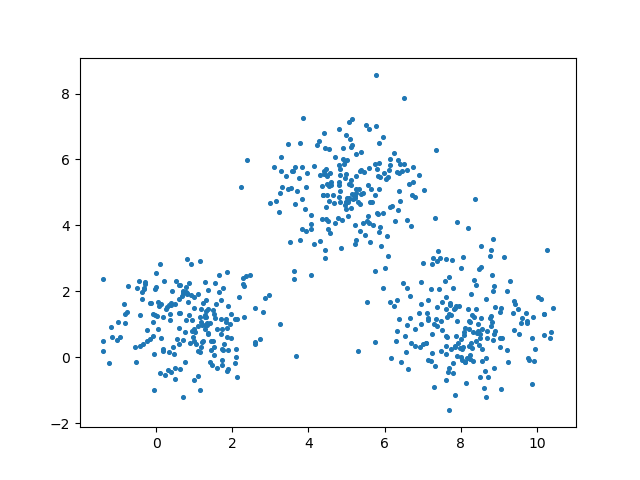

In [126]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [139]:
def init_centroids(datapoints, amount):
    return datapoints[np.random.choice(datapoints.shape[0], amount)]
centroids = init_centroids(data, 3)

In [140]:
def find_closest_centroids(datapoints, centroids):
    idxs = np.zeros(datapoints.shape[0])
    for i in range(len(datapoints)):
        distances = np.power(np.array(datapoints[i] - centroids), 2)
        idxs[i] = np.argmin(np.sum(distances, axis = 1))
    return idxs
idxs = find_closest_centroids(data, centroids)

In [141]:
def centroid_means(data, idxs, no_centroids):
    new_centroids = np.zeros((no_centroids, 2))
    for i in range(no_centroids):
        matched_datapoints = data[i == idxs]
        new_centroids[i] = np.mean(matched_datapoints, axis = 0)
    return new_centroids
centroids = centroid_means(data,idxs, 3)

1


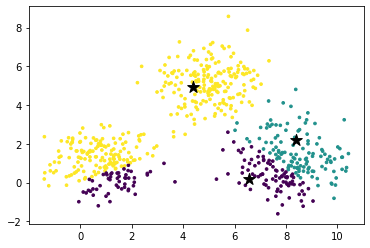

5.883987277952253


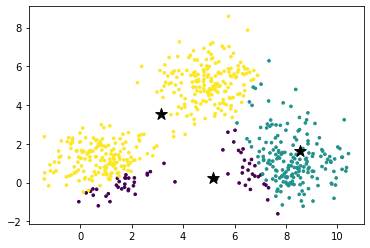

1.7465180937905336


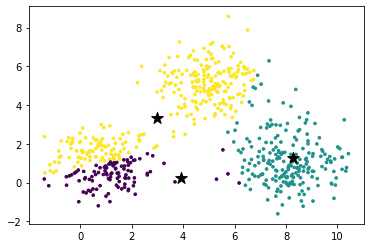

7.223934120874053


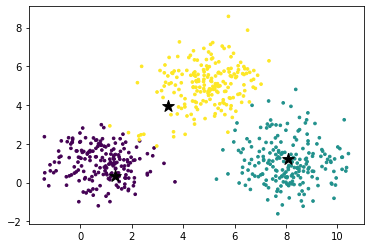

4.141557222463165


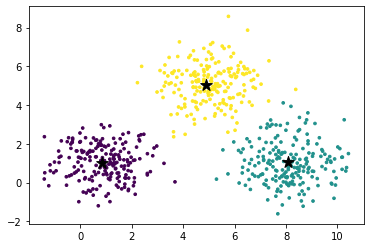

0.03445887942089394


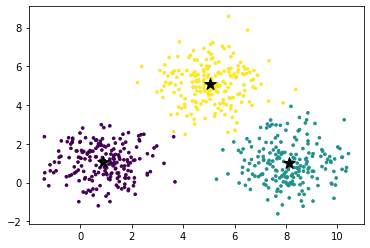

0.0010026362055036984


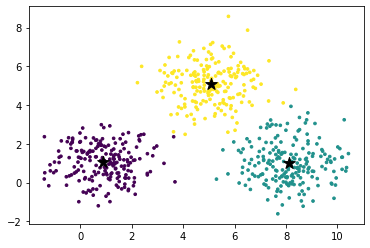

In [169]:
#%matplotlib inline
plt.ion()
no_centroids = 3
old_centroids = init_centroids(data, no_centroids)
new_centroids = old_centroids
err = 1
while err != 0:
    print(err)
    idxs = find_closest_centroids(data, new_centroids)
    plt.scatter(data[:,0], data[:,1], c = idxs, s=7)
    plt.scatter(new_centroids[:,0], new_centroids[:,1], marker='*', c="0", s=150)
    old_centroids = new_centroids
    new_centroids = centroid_means(data,idxs, no_centroids)
    err = np.power(np.array(new_centroids - old_centroids), 2)
    err = np.sum(err)
    plt.pause(0.2)